In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPR
import Options

TICKER = 'SPY'

('2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-13', '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-24', '2025-10-31', '2025-11-07', '2025-11-14', '2025-11-21', '2025-11-28', '2025-12-19', '2025-12-31', '2026-01-16', '2026-01-30', '2026-02-20', '2026-02-27', '2026-03-20', '2026-03-31', '2026-06-18', '2026-06-30', '2026-09-18', '2026-09-30', '2026-12-18', '2027-01-15', '2027-12-17', '2028-01-21')


C:\Users\adamd\AppData\Local\Temp\ipykernel_24568\2337269786.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = yf.Ticker(TICKER).history(period='1d')['Close'][0]


        contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   SPY251013C00635000 2025-09-29 15:17:23+00:00   635.0      30.33  35.58   
1   SPY251013C00640000 2025-10-06 14:51:57+00:00   640.0      31.37  31.98   
2   SPY251013C00642000 2025-10-02 13:41:37+00:00   642.0      28.81  30.01   
3   SPY251013C00644000 2025-10-03 17:08:04+00:00   644.0      28.21  28.03   
4   SPY251013C00645000 2025-10-01 16:00:53+00:00   645.0      26.41  27.05   
5   SPY251013C00648000 2025-10-03 20:05:10+00:00   648.0      24.29  24.14   
6   SPY251013C00650000 2025-10-03 17:13:03+00:00   650.0      21.45  22.22   
7   SPY251013C00651000 2025-10-06 13:37:30+00:00   651.0      21.33  21.23   
8   SPY251013C00652000 2025-10-03 14:49:19+00:00   652.0      21.40  20.31   
9   SPY251013C00653000 2025-10-02 13:56:18+00:00   653.0      19.01  19.34   
10  SPY251013C00654000 2025-10-03 15:01:54+00:00   654.0      17.37  18.38   
11  SPY251013C00655000 2025-10-03 17:51:18+00:00   655.0      17

C:\Users\adamd\PyCharmMiscProject\Options.py:30: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4424.)
  return torch.sum( (I - torch.tensor(price_data.values))**2 )/observation_variance + w.T @ weights_covariance_INV @ w


Iteration 0: Weights: tensor([9.9000, 9.9000], requires_grad=True), Loss = 8967955.000000017
Iteration 10: Weights: tensor([8.9046, 8.9046], requires_grad=True), Loss = 8967954.96212593
Iteration 20: Weights: tensor([7.9308, 7.9308], requires_grad=True), Loss = 8967954.928854736
Iteration 30: Weights: tensor([6.9954, 6.9954], requires_grad=True), Loss = 8967954.90044588
Iteration 40: Weights: tensor([6.1118, 6.1118], requires_grad=True), Loss = 8967954.876819016
Iteration 50: Weights: tensor([5.2888, 5.2888], requires_grad=True), Loss = 8967954.857635448
Iteration 60: Weights: tensor([4.5321, 4.5321], requires_grad=True), Loss = 8967954.842405798
Iteration 70: Weights: tensor([3.8445, 3.8445], requires_grad=True), Loss = 8967954.830577152
Iteration 80: Weights: tensor([3.2270, 3.2270], requires_grad=True), Loss = 8967954.821590696
Iteration 90: Weights: tensor([2.6793, 2.6793], requires_grad=True), Loss = 8967954.814916698
Iteration 100: Weights: tensor([2.1995, 2.1995], requires_grad=

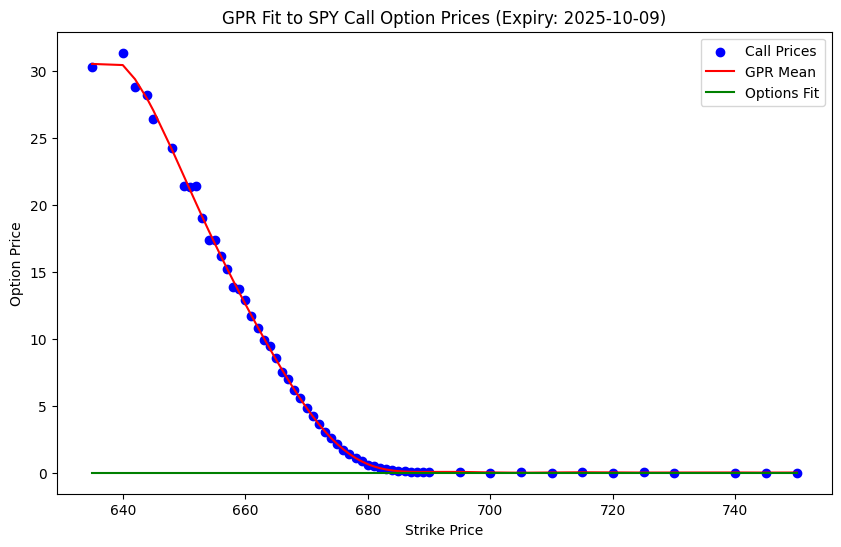

NameError: name 'g' is not defined

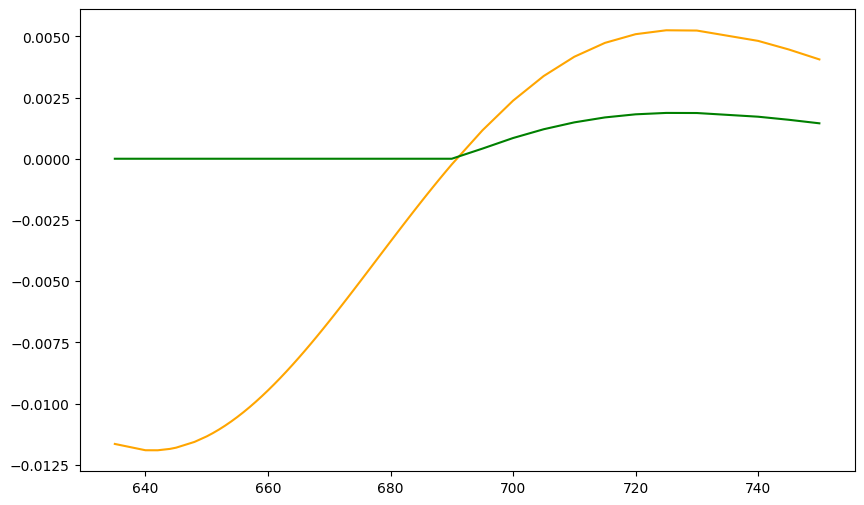

In [ ]:
ExpiryDates = yf.Ticker(TICKER).options
print(ExpiryDates)
options = yf.Ticker(TICKER).option_chain(ExpiryDates[5])
Calls = options.calls
Puts = options.puts
current_price = yf.Ticker(TICKER).history(period='1d')['Close'][0]
K = Calls['strike']
k = np.log(Calls['strike'] / current_price)

print(Calls)

plt.figure(figsize=(10, 6))
plt.scatter(K, Calls['lastPrice'], color='blue', label='Call Prices')

mu, COV, mu_xx = GPR.fit_option_price(Calls['strike'], Calls['lastPrice'], current_price)
w, h, f = Options.fit_option_price(Calls['strike'], Calls['lastPrice'], current_price)
plt.plot(K, mu, color='red', label='GPR Mean')
plt.plot(K, f, color='green', label='Options Fit')
plt.legend()
plt.title(f'GPR Fit to {TICKER} Call Option Prices (Expiry: {ExpiryDates[3]})')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(K, mu_xx, color='orange', label='d2mu/dK2')
mu_xx = np.maximum(mu_xx, 0) / np.abs(np.trapezoid(Calls['strike'].values, np.maximum(mu_xx, 0)))  # Ensure non-negativity & Normalize
plt.plot(K, mu_xx, color='green', label='Non-negative d2mu/dK2')
plt.plot(K, h, color='purple', label='d2F/dK2')
